# Term Deposit
@author: Talardia Gbangou, October 2022

We want to predict the performance of client who did or did not subscribe to a term deposit. The aim is to reach performance score (score >=81%) by evaluating a 5-fold cross-validation and reporting the average performance score.

Bellow, we following steps:

* load the required libraries and models.
* Exploring, visualizing, describing, and understanding the dataset.
* Examine classes and class imbalance
* Check multicollinearity for numerical and categorical features:significance analysis 
* Removing outliers.
* Splitting the dataset into Train and Test sets 
* Fixing the imbalanced issue.
* Testing different Machine Learning pipelines with lazypredict to select the best baic models.
* Evaluating models and analyzing results.

### Load the dataset

As a first step you must load the dataset. 

Execute the code in the cell below to load the packages required  to run this notebook. 

# Importing modules

In [785]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

# Load data

In [786]:
df = pd.read_csv("term-deposit-marketing-2020.csv")

In [787]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


Attributes:

* age : age of customer (numeric)

* job : type of job (categorical)

* marital : marital status (categorical)

* education (categorical)

* default: has credit in default? (binary)

* balance: average yearly balance, in euros (numeric)

* housing: has a housing loan? (binary)

* loan: has personal loan? (binary)

* contact: contact communication type (categorical)

* day: last contact day of the month (numeric)

* month: last contact month of year (categorical)

* duration: last contact duration, in seconds (numeric)

* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Output (desired target):

* y - has the client subscribed to a term deposit? (binary)

# Exploratory Data Analysis

In [788]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


Correlation map

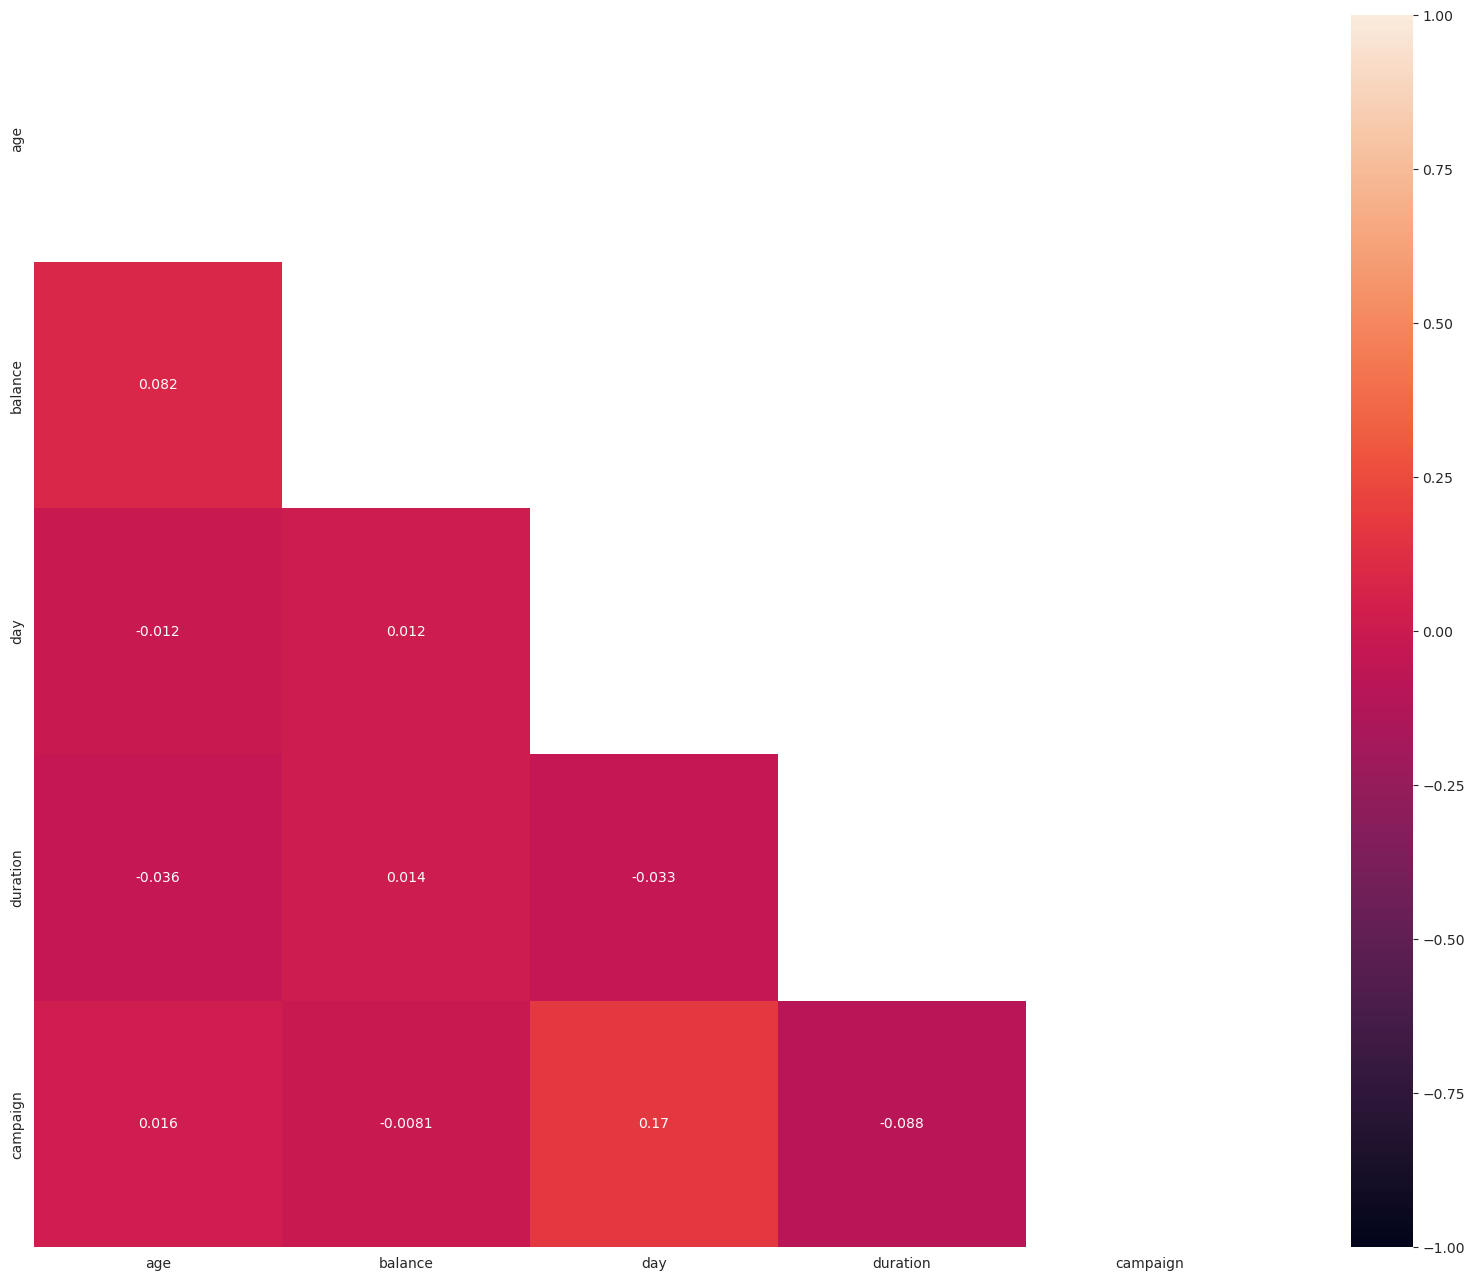

In [789]:
fig, ax = plt.subplots(figsize=(20, 16))
df_corr = df.corr(method="pearson")
mask = np.zeros_like(np.array(df_corr))
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(df_corr, mask=mask,annot=True,vmin=-1, vmax=1)

we have numeric and categorical features

In [790]:
df.describe()

,age,balance,day,duration,campaign
count,40000.00,40000.00,40000.00,40000.00,40000.00
mean,40.54,1274.28,16.02,254.82,2.88
std,9.64,2903.77,8.28,259.37,3.24
min,19.00,-8019.00,1.00,0.00,1.00
25%,33.00,54.00,8.00,100.00,1.00
50%,39.00,407.00,17.00,175.00,2.00
75%,48.00,1319.00,21.00,313.00,3.00
max,95.00,102127.00,31.00,4918.00,63.00


Correlation map

In [791]:
# plt.figure(figsize=(16, 6))
# heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
# heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

## Missing data
Let's check if there is are missing data

In [792]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

we have no missing values

## Examine classes and class imbalance
We are looking for features that help separate the target categories

<AxesSubplot:xlabel='y', ylabel='count'>

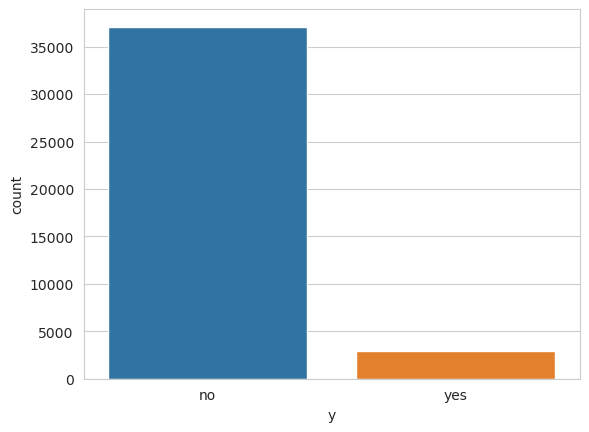

In [793]:
sns.countplot(x='y',data=df)

In [794]:
df_percentage = pd.DataFrame(df.y.value_counts())

In [795]:
df_percentage['Percentage (%)'] = (df_percentage['y']/df_percentage['y'].sum())*100

In [796]:
df_percentage

,y,Percentage (%)
no,37104,92.76
yes,2896,7.24


We have very unbalanced data here with only about 7% in the positive class (i.e. subscription of client to a deposit). We will have to deal with this when training data to assess the performance of the model. This can be done by undersampling,oversampling, adjusting class weights in models, or possibly look at more than one of these to get the best result. We also need to chose adequate performance metric (like F-score that combine precision-recall or ranking metric such as ROC AUC).`

### Visualize class separation by numeric features
* We visualize to understand which numeric features (age, balance, campaign, et day) are useful for class separation.

In [797]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

In [798]:
cols_numeric=['age','balance','day','duration', 'campaign']

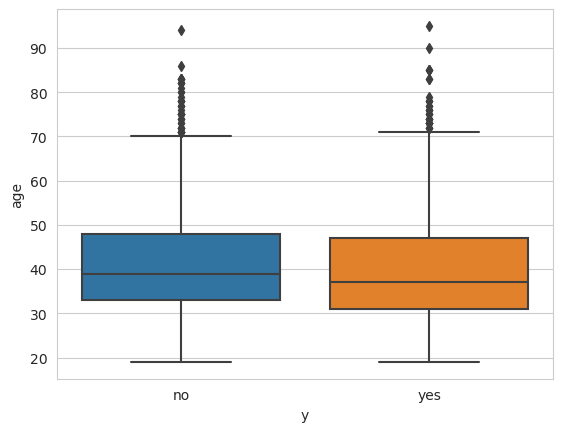

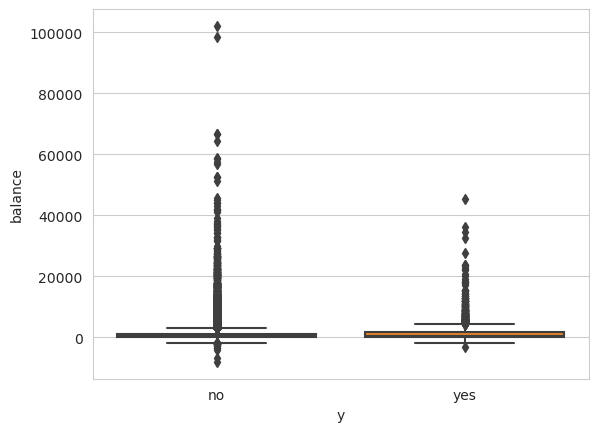

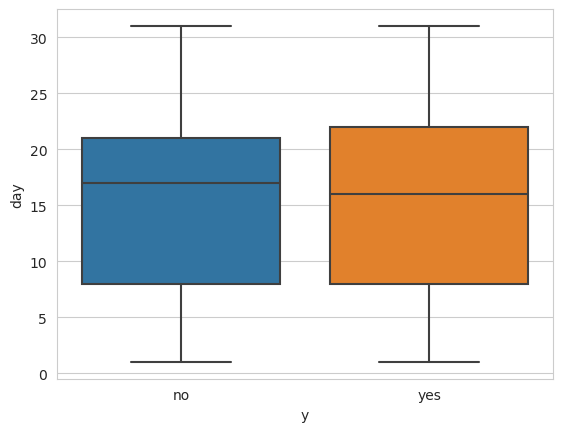

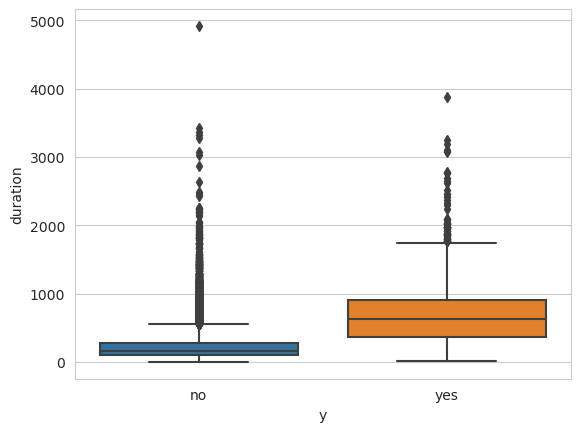

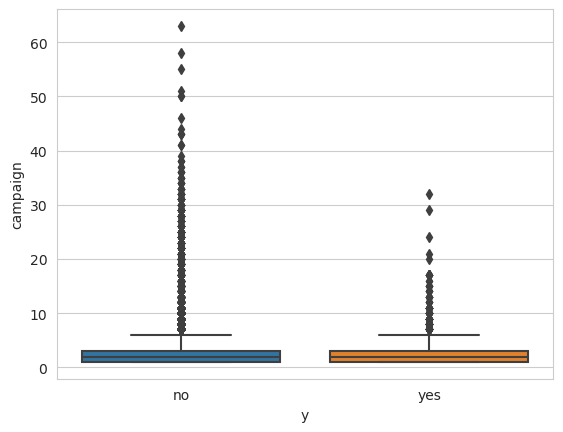

In [799]:
def plot_boxplot(df, cols, col_x = 'y'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(y=col, x=col_x, data=df)
        plt.show()

plot_boxplot(df, cols_numeric, col_x = 'y')

* For age and duration, there seems to be a useful separation between yes and no subscription of the client to the term deposit
* On the other hands, balance, campaign, and day does not seem to matter

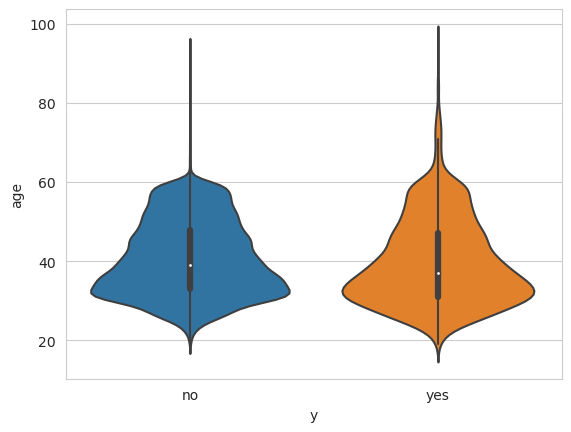

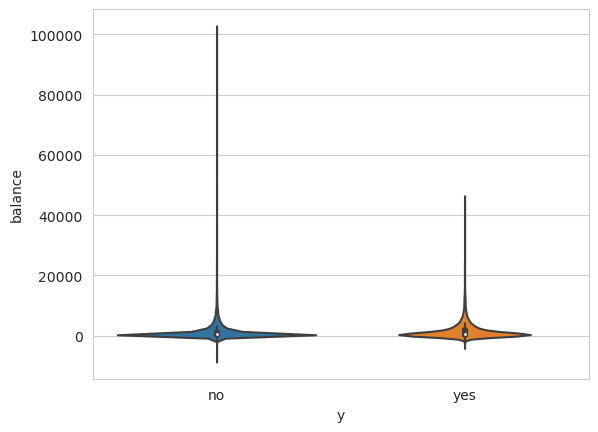

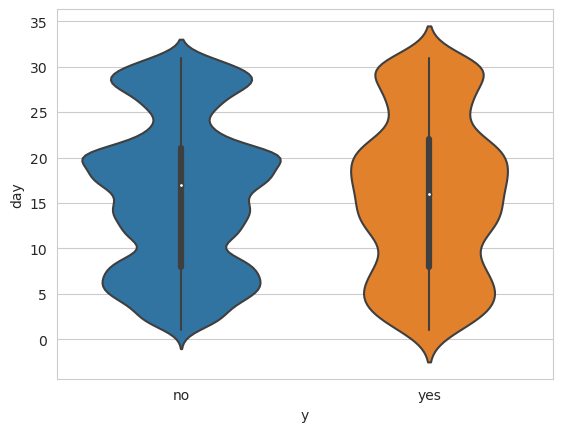

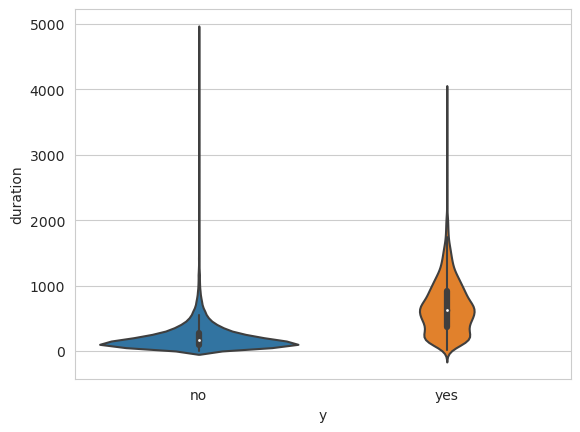

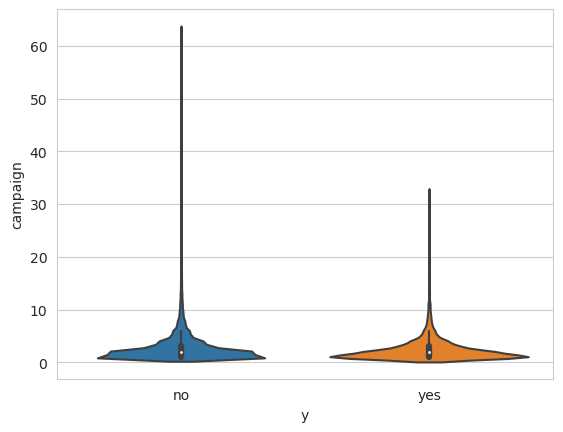

In [800]:
def plot_violin(df, cols, col_x = 'y'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(y=col, x=col_x, data=df)
        plt.show()

plot_violin(df, cols_numeric, col_x = 'y')

In [801]:
cols_cate= ['job', 'marital', 'education', 'default','housing',
       'loan', 'contact', 'month']
# cols_cate= ['job', 'marital', 'education', 'default','housing',
#        'loan', 'contact']

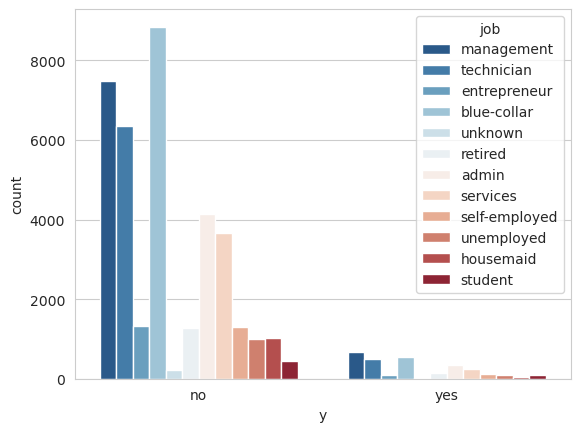

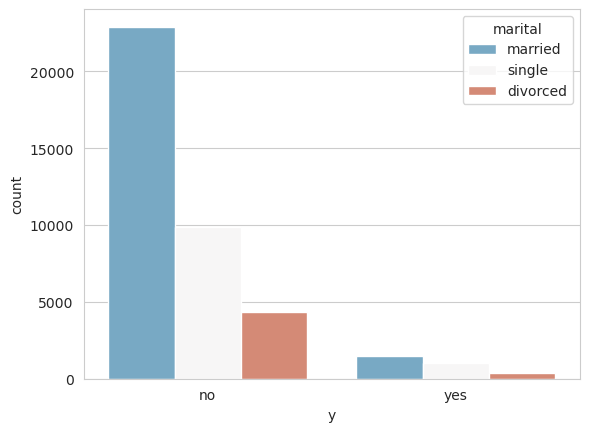

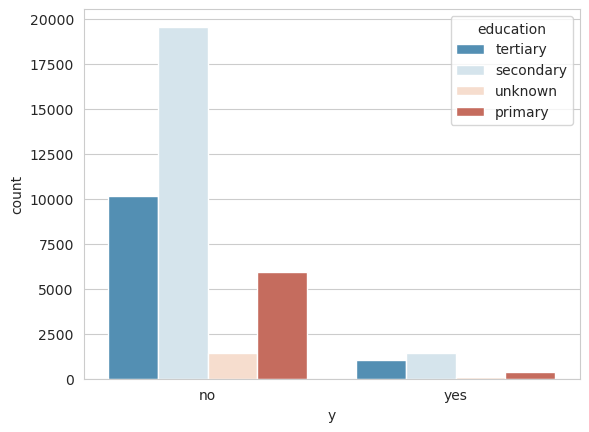

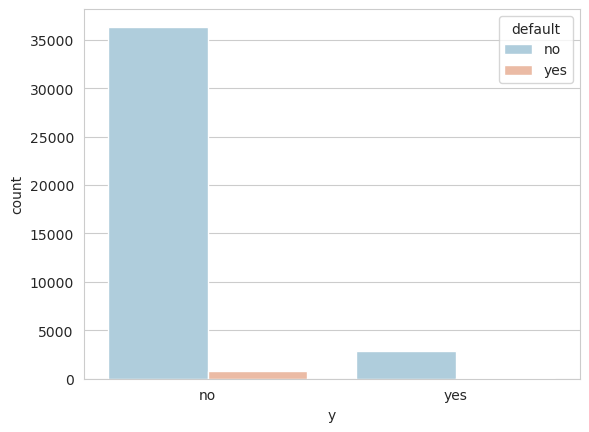

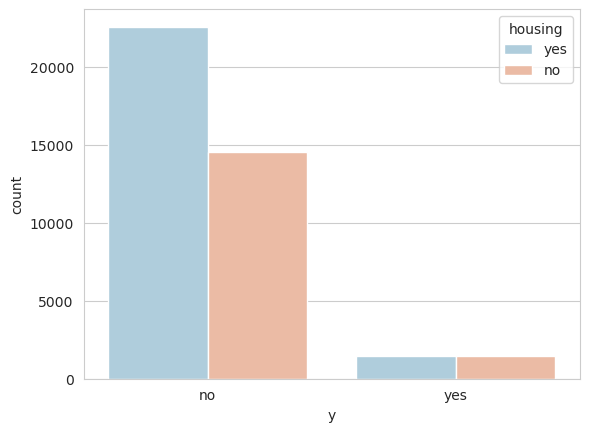

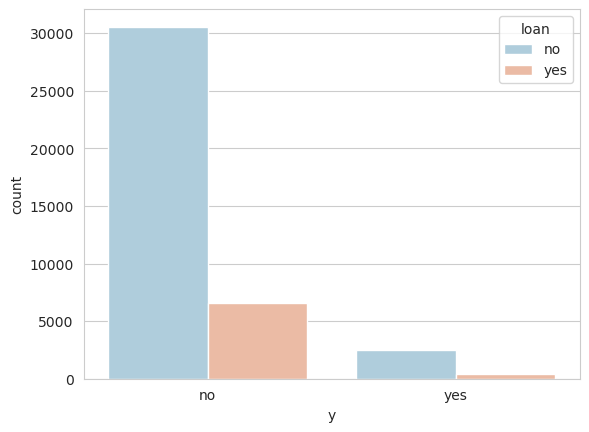

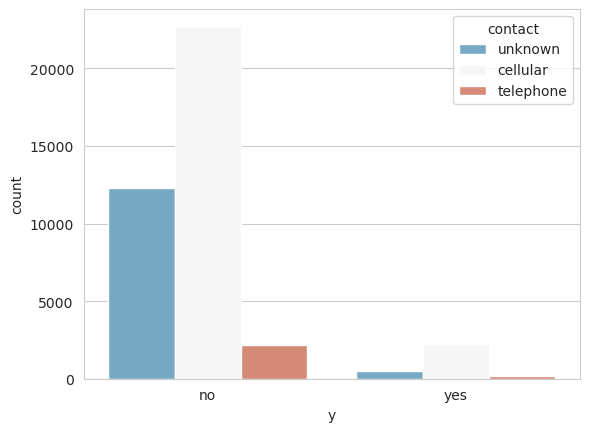

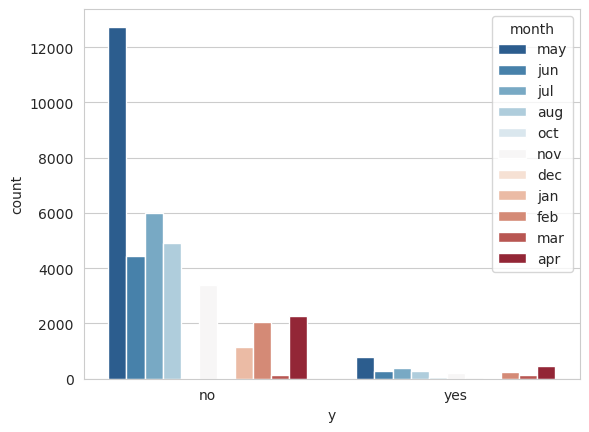

In [802]:
def plot_bar(df, cols, col_x = 'y'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.countplot(x=col_x,hue=col,data=df,palette='RdBu_r')
        plt.show()

plot_bar(df, cols_cate, col_x = 'y')

* Other most features have a dominant category (i.e. negative class) with very few cases of other category. It hard to say which category is has a high or little power to separate the cases.

## Check Multicollinearity for numerical  and the target features

* Ho (null hypothesis): There is no difference between the numerical feature and the target feature
* H1 (alternative hypothesis): There is difference between the numerical feature and the target feature
* confidence interval : 95%
* anova test is appropriate here (we have a numerical and categorical feauture)

In [803]:
import scipy.stats as stats


In [804]:
anova_test=[]
for feature in cols_numeric: 
    df_anova = df[['y',feature]]
    grps = pd.unique(df_anova.y.values)
    # grps
    d_data = {grp:df_anova[feature][df_anova.y == grp] for grp in grps}
    # d_data
    F, p = stats.f_oneway(d_data['no'], d_data['yes'])
#     print(p)
    if p<0.05:
#         print("reject null hypothesis")
        anova_test.append("reject null hypothesis")
    else:
#         print("Fail to Reject Null Hypothesis")
        anova_test.append("Fail to Reject Null Hypothesis")
result1 = pd.DataFrame(data=[cols_numeric,anova_test]).T
result1.columns = ['Column','Hypothesis_Result']
result1

,Column,Hypothesis_Result
0,age,reject null hypothesis
1,balance,reject null hypothesis
2,day,Fail to Reject Null Hypothesis
3,duration,reject null hypothesis
4,campaign,reject null hypothesis


## Check Multicollinearity for Categorical features

* Ho (null hypothesis): There is no difference between the categorical feature and the target
* H1 (alternative hypothesis): There is difference between categorical feature and the target
* confidence interval : 95%
* chi2 test is appropriate here

In [805]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in cols_cate:
    if chi2_contingency(pd.crosstab(df['y'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[cols_cate, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,job,Reject Null Hypothesis
1,marital,Reject Null Hypothesis
2,education,Reject Null Hypothesis
3,default,Fail to Reject Null Hypothesis
4,housing,Reject Null Hypothesis
5,loan,Reject Null Hypothesis
6,contact,Reject Null Hypothesis
7,month,Reject Null Hypothesis


The significance test show that day and default features are not significantly related to the traget variable (subscription to term deposit). Therefore we will drop these features. We will also remove the date feature "month".

In [806]:
df.drop(["day","default","month"],axis=1,inplace=True)
df.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'y'],
      dtype='object')

## Remove outliers with z-score

In [807]:
cols_numeric1=['age','balance','duration', 'campaign']

In [808]:
#remove outliers with z-score method
z = np.abs(stats.zscore(df.select_dtypes('int64')))
df= df[(abs(z) < 3).all(axis=1)]

Visualization after removing outliers

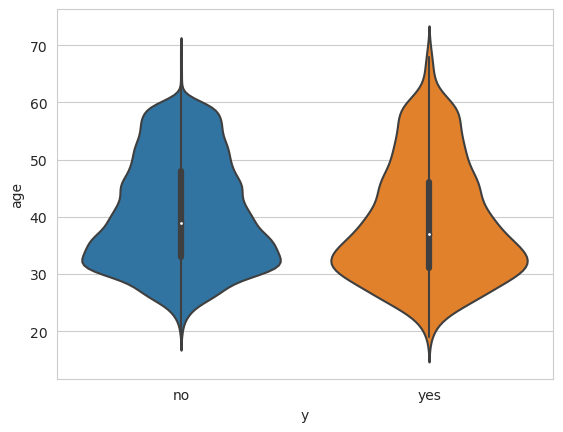

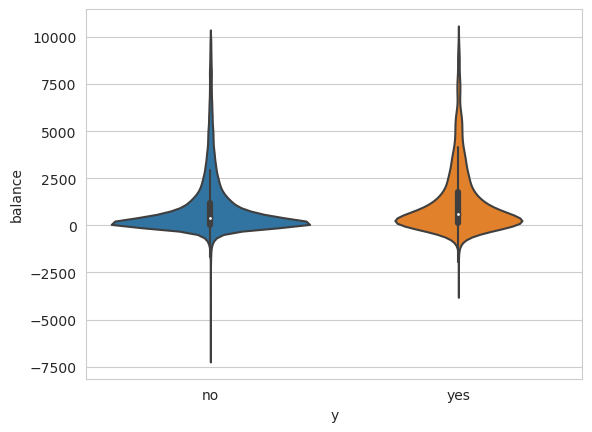

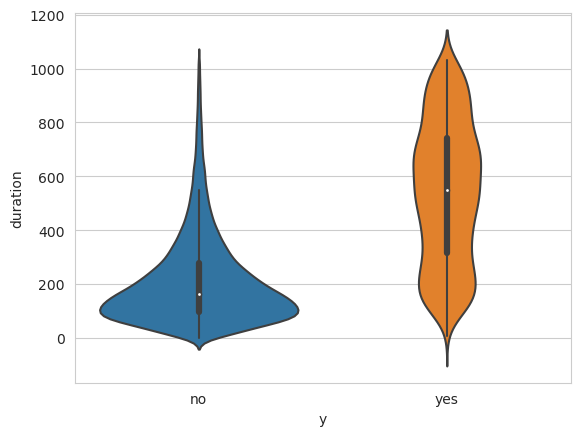

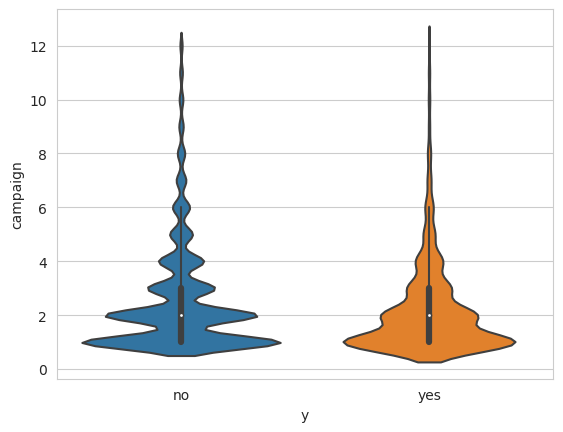

In [809]:
def plot_violin(df, cols, col_x = 'y'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(y=col, x=col_x, data=df)
        plt.show()

plot_violin(df, cols_numeric1, col_x = 'y')

## Treating categorical variables

Check the need for aggregation of some categories

In [810]:
df.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'y'],
      dtype='object')

In [811]:
cols_cate1= ['job', 'marital', 'education','housing',
       'loan', 'contact']
# cols_cate1= ['job', 'marital', 'education','housing',
#        'loan', 'contact', 'month']

In [812]:
for col in cols_cate1:
    print("feature name:",col,'\n',df[col].value_counts())

feature name: job 
 blue-collar      8905
management       7558
technician       6441
admin            4266
services         3725
entrepreneur     1322
self-employed    1301
retired          1294
unemployed       1045
housemaid        1013
student           499
unknown           214
Name: job, dtype: int64
feature name: marital 
 married     22899
single      10219
divorced     4465
Name: marital, dtype: int64
feature name: education 
 secondary    19895
tertiary     10339
primary       5929
unknown       1420
Name: education, dtype: int64
feature name: housing 
 yes    22754
no     14829
Name: housing, dtype: int64
feature name: loan 
 no     30993
yes     6590
Name: loan, dtype: int64
feature name: contact 
 cellular     23430
unknown      12048
telephone     2105
Name: contact, dtype: int64


investigation of investigated show that each category seems to have sufficient samples.

Convert Yes and No to 1 or 0

In [813]:
yes_no_columns =['housing','y','loan']

In [814]:
for col in yes_no_columns:
    df[col].replace({'yes': 1,'no': 0},inplace=True)

In [815]:
for col in yes_no_columns:
    print("feature name:",col,'\n',df[col].unique())

feature name: housing 
 [1 0]
feature name: y 
 [0 1]
feature name: loan 
 [0 1]


One hot encoding for categorical columns

In [816]:
# cols_for_ohe=['job','marital','contact','month','education']
cols_for_ohe=['job','marital','contact','education']

In [817]:
df = pd.get_dummies(data=df, columns=cols_for_ohe)
df.columns

Index(['age', 'balance', 'housing', 'loan', 'duration', 'campaign', 'y',
       'job_admin', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'contact_cellular', 'contact_telephone', 'contact_unknown',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown'],
      dtype='object')

In [818]:
df.head()

,age,balance,housing,loan,duration,campaign,y,job_admin,job_blue-collar,job_entrepreneur,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,education_primary,education_secondary,education_tertiary,education_unknown
0,58,2143,1,0,261,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,44,29,1,0,151,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,33,2,1,1,76,1,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
3,47,1506,1,0,92,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,33,1,0,0,198,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [819]:
# cols_to_scale =['age','balance','day','duration']
cols_to_scale =['age','balance','duration']

In [820]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [821]:
# scaler=RobustScaler()
scaler=MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df.head(5)
#df.default.value_counts()

,age,balance,housing,loan,duration,campaign,y,job_admin,job_blue-collar,job_entrepreneur,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,education_primary,education_secondary,education_tertiary,education_unknown
0,0.78,0.53,1,0,0.25,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0.50,0.41,1,0,0.15,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,0.28,0.41,1,1,0.07,1,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
3,0.56,0.50,1,0,0.09,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,0.28,0.41,0,0,0.19,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


# Modelling
* Splitting the dataset: let us take 20% of the data for the test and 80% for the train.
* Target of our data is the variable y.
* Perform resampling to balance the data. we will choose an oversampling technique
* Check the performance of basbic machine models without hyperparameter tuning. choose 3 best models
* Perform hyperparameter tunning the selected models
* Perform some features enginering

In [822]:
# pip install lazypredict
#!python -m pip uninstall lazypredict --yes

In [823]:
#splitting data
from sklearn.model_selection import train_test_split

#models
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import NuSVC
from sklearn.svm import SVC
from sklearn.svm import SVC

#model selections
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

#performance metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#save models
import joblib
#shap analysis
import shap

In [824]:
X=df.drop("y",axis=1) #features or independent variable
y=df["y"] #target or dependent variable
X.columns

Index(['age', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'job_admin', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'contact_cellular', 'contact_telephone', 'contact_unknown',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown'],
      dtype='object')

In [825]:
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=0,stratify=y)

In [826]:
# print(X_train.shape)
# print(y_train.shape)

# print(X_val.shape)
# print(y_val.shape)

In [827]:
# y_train.value_counts()

In [828]:
# y_val.value_counts()

## Oversampling

In [829]:
from collections import Counter
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTETomek

In [830]:
# os=NearMiss(0.8)
# X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
# print("The number of classes before fit {}".format(Counter(y_train)))
# print("The number of classes after fit {}".format(Counter(y_train_ns)))

In [831]:
# os=RandomOverSampler(0.75)
# X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
# print("The number of classes before fit {}".format(Counter(y_train)))
# print("The number of classes after fit {}".format(Counter(y_train_ns)))

In [832]:
# os=SMOTETomek(0.80)
# X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
# print("The number of classes before fit {}".format(Counter(y_train)))
# print("The number of classes after fit {}".format(Counter(y_train_ns)))

In [833]:
ot=SMOTE(sampling_strategy="minority")
X_ns,y_ns=ot.fit_resample(X,y)
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_ns)))
X_ns.shape,y_ns.value_counts()

The number of classes before fit Counter({0: 35313, 1: 2270})
The number of classes after fit Counter({0: 35313, 1: 35313})


((70626, 28),
 0    35313
 1    35313
 Name: y, dtype: int64)

In [834]:
X_train, X_val, y_train, y_val = train_test_split(X_ns,y_ns, test_size=0.30, random_state=0,stratify=y_ns)

## Hyperparameter tuning and Kfold-cross validation

Testing all basic machine learning models. Because we have a classification problem, we will test just models of classification using the lazyClassifier package

In [835]:
lazym_clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = lazym_clf.fit(X_train, X_val, y_train, y_val)
models

 90%|██████████████████████████████████████▌    | 26/29 [09:47<02:30, 50.29s/it]

[15:09:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|███████████████████████████████████████████| 29/29 [09:52<00:00, 20.43s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.96,0.96,0.96,0.96,4.34
ExtraTreesClassifier,0.94,0.94,0.94,0.94,14.87
LGBMClassifier,0.94,0.94,0.94,0.94,0.66
RandomForestClassifier,0.93,0.93,0.93,0.93,7.21
KNeighborsClassifier,0.92,0.92,0.92,0.92,3.84
BaggingClassifier,0.91,0.91,0.91,0.91,2.75
ExtraTreeClassifier,0.89,0.89,0.89,0.89,0.15
SVC,0.89,0.89,0.89,0.89,145.49
DecisionTreeClassifier,0.88,0.88,0.88,0.88,0.49


let select the first 3 models by accuracy

In [836]:
best_models=models.sort_values(by=['ROC AUC'], ascending=False).index.tolist()
list_models=best_models[:10]
list_models

['XGBClassifier',
 'ExtraTreesClassifier',
 'LGBMClassifier',
 'RandomForestClassifier',
 'KNeighborsClassifier',
 'BaggingClassifier',
 'ExtraTreeClassifier',
 'SVC',
 'DecisionTreeClassifier',
 'NuSVC']

In [837]:
model_rf=LogisticRegression()
model_rf.fit(X_train,y_train)
rf_cross=cross_validate(model_rf,X,y,scoring="roc_auc")
print("Test accuracy on folds: ", rf_cross['test_score']*100, "%")
print("Average  test accuracy:" ,rf_cross['test_score'].mean()*100, "%")

Test accuracy on folds:  [96.04497222 91.04550549 78.71912386 82.24763798 87.72205775] %
Average  test accuracy: 87.1558594575727 %


In [838]:
model_rf=LGBMClassifier()
model_rf.fit(X_train,y_train)
rf_cross=cross_validate(model_rf,X,y,scoring="roc_auc")
print("Test accuracy on folds: ", rf_cross['test_score']*100, "%")
print("Average  test accuracy:" ,rf_cross['test_score'].mean()*100, "%")

Test accuracy on folds:  [72.1917625  88.78226858 81.1732326  83.13770918 86.59966726] %
Average  test accuracy: 82.37692802342818 %


In [839]:
# model_rf=AdaBoostClassifier()
# model_rf.fit(X_train_ns,y_train_ns)
# rf_cross=cross_validate(model_rf,X,y,scoring="roc_auc")
# print("Test accuracy on folds: ", rf_cross['test_score']*100, "%")
# print("Average  test accuracy:" ,rf_cross['test_score'].mean()*100, "%")

In [840]:
params_grid_lrg={'C':10.0 **np.arange(-2,3),'penalty':['none','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

grid_lrg=GridSearchCV(LogisticRegression(),params_grid_lrg,n_jobs=-1,scoring='precision',cv=cv)
grid_lrg.fit(X_train,y_train)

grid_lrg.best_params_
model_lrg=grid_lrg.best_estimator_

y_train_pred_lrg=model_lrg.predict(X_train)
y_val_pred_lrg=model_lrg.predict(X_val)

print("confusion matrix for random forest training data:")
print(confusion_matrix(y_train,y_train_pred_lrg))
print("classification report random forest:")
print(classification_report(y_train,y_train_pred_lrg))

print("confusion matrix for random forest validation data:")
print(confusion_matrix(y_val,y_val_pred_lrg))
print("classification report random forest:")
print(classification_report(y_val,y_val_pred_lrg))

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    htt

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable

confusion matrix for random forest training data:
[[21376  3343]
 [ 3652 21067]]
classification report random forest:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86     24719
           1       0.86      0.85      0.86     24719

    accuracy                           0.86     49438
   macro avg       0.86      0.86      0.86     49438
weighted avg       0.86      0.86      0.86     49438

confusion matrix for random forest validation data:
[[9141 1453]
 [1547 9047]]
classification report random forest:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     10594
           1       0.86      0.85      0.86     10594

    accuracy                           0.86     21188
   macro avg       0.86      0.86      0.86     21188
weighted avg       0.86      0.86      0.86     21188



In [841]:
# params_grid_ab={
#     'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20, 30]
# }

params_grid_ab={
    'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
    'algorithm': ['SAMME', 'SAMME.R']
}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

grid_ab=GridSearchCV(AdaBoostClassifier(),params_grid_ab,scoring="accuracy",cv=cv,verbose=1,n_jobs = 4)
grid_ab.fit(X_train,y_train)

grid_ab.best_params_
model_ab=grid_ab.best_estimator_

y_train_pred_ab=model_ab.predict(X_train)
y_val_pred_ab=model_ab.predict(X_val)

print("confusion matrix for random forest training data:")
print(confusion_matrix(y_train,y_train_pred_ab))
print("classification report random forest:")
print(classification_report(y_train,y_train_pred_ab))

print("confusion matrix for random forest validation data:")
print(confusion_matrix(y_val,y_val_pred_ab))
print("classification report random forest:")
print(classification_report(y_val,y_val_pred_ab))

Fitting 5 folds for each of 192 candidates, totalling 960 fits
confusion matrix for random forest training data:
[[20849  3870]
 [ 3883 20836]]
classification report random forest:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84     24719
           1       0.84      0.84      0.84     24719

    accuracy                           0.84     49438
   macro avg       0.84      0.84      0.84     49438
weighted avg       0.84      0.84      0.84     49438

confusion matrix for random forest validation data:
[[8882 1712]
 [1704 8890]]
classification report random forest:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84     10594
           1       0.84      0.84      0.84     10594

    accuracy                           0.84     21188
   macro avg       0.84      0.84      0.84     21188
weighted avg       0.84      0.84      0.84     21188



In [842]:
# model_rf=AdaBoostClassifier()
# model_rf.fit(X_train_ns,y_train_ns)
rf_cross=cross_validate(model_ab,X,y,scoring="accuracy")
print("Test accuracy on folds: ", rf_cross['test_score']*100, "%")
print("Average  test accuracy:" ,rf_cross['test_score'].mean()*100, "%")

Test accuracy on folds:  [94.27963283 94.34614873 92.13782094 91.84406599 92.72219266] %
Average  test accuracy: 93.06597222984297 %


In [843]:
params_grid_rf={"class_weight":["balanced"],'n_estimators': [10, 20, 50],
    'max_depth': [2, 5, 10],
    'criterion': ['gini','entropy']
}

cv=KFold(n_splits=5,random_state=None,shuffle=False)
rf_grid=GridSearchCV(RandomForestClassifier(random_state=0),params_grid_rf,scoring="accuracy",cv=cv,verbose=1,n_jobs = 4)
rf_grid.fit(X_train,y_train)

rf_grid.best_params_
model_rf=rf_grid.best_estimator_

y_train_pred_rf=model_rf.predict(X_train)
y_val_pred_rf=model_rf.predict(X_val)

print("confusion matrix for random forest training data:")
print(confusion_matrix(y_train,y_train_pred_rf))

print("classification report random forest:")
print(classification_report(y_train,y_train_pred_rf))

print("confusion matrix for random forest validation data:")
print(confusion_matrix(y_val,y_val_pred_rf))
print("classification report random forest:")
print(classification_report(y_val,y_val_pred_rf))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
confusion matrix for random forest training data:
[[21038  3681]
 [ 1870 22849]]
classification report random forest:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88     24719
           1       0.86      0.92      0.89     24719

    accuracy                           0.89     49438
   macro avg       0.89      0.89      0.89     49438
weighted avg       0.89      0.89      0.89     49438

confusion matrix for random forest validation data:
[[8877 1717]
 [ 909 9685]]
classification report random forest:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87     10594
           1       0.85      0.91      0.88     10594

    accuracy                           0.88     21188
   macro avg       0.88      0.88      0.88     21188
weighted avg       0.88      0.88      0.88     21188



In [844]:
import shap
shap.initjs()

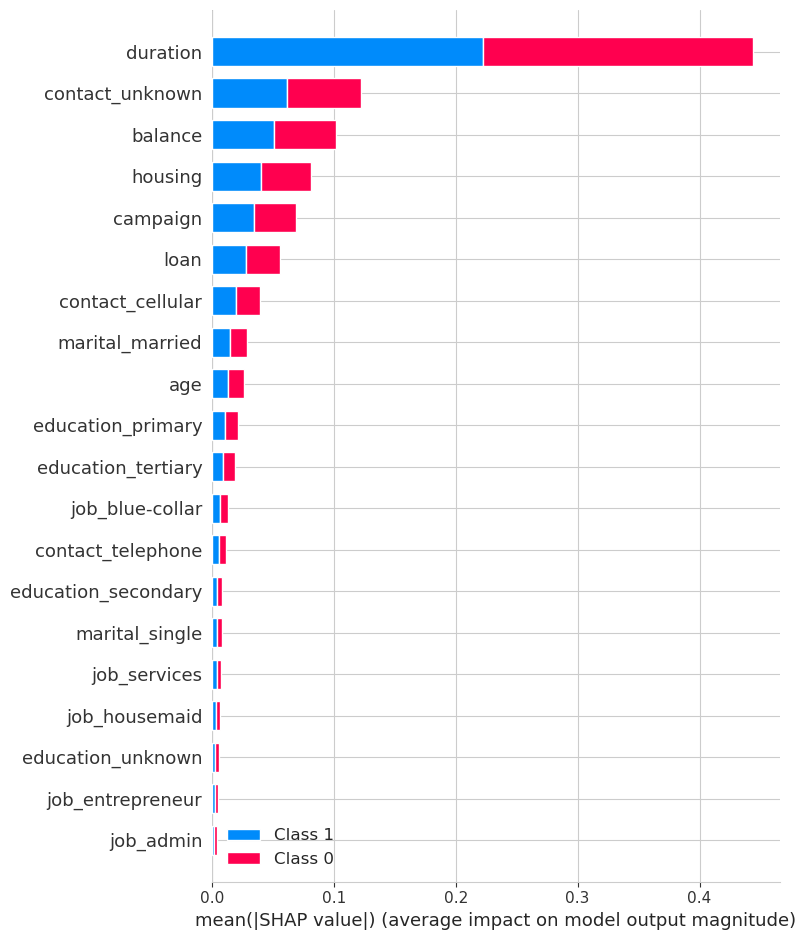

In [845]:
explainer = shap.TreeExplainer(model_rf)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, features=X, feature_names=X.columns)

In [846]:
X.columns

Index(['age', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'job_admin', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'contact_cellular', 'contact_telephone', 'contact_unknown',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown'],
      dtype='object')

In [847]:
selected_feat1 =['age', 'balance', 'housing', 'loan', 'duration','campaign','marital_married', 'marital_single',
       'contact_cellular', 'contact_unknown', 'education_primary', 'education_tertiary']

In [848]:
X1 = X[selected_feat1]
X1.head()

,age,balance,housing,loan,duration,campaign,marital_married,marital_single,contact_cellular,contact_unknown,education_primary,education_tertiary
0,0.78,0.53,1,0,0.25,1,1,0,0,1,0,1
1,0.50,0.41,1,0,0.15,1,0,1,0,1,0,0
2,0.28,0.41,1,1,0.07,1,1,0,0,1,0,0
3,0.56,0.50,1,0,0.09,1,1,0,0,1,0,0
4,0.28,0.41,0,0,0.19,1,0,1,0,1,0,0


In [849]:
ot=SMOTE(sampling_strategy="minority")
X_ns1,y_ns1=ot.fit_resample(X1,y)
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_ns1)))

The number of classes before fit Counter({0: 35313, 1: 2270})
The number of classes after fit Counter({0: 35313, 1: 35313})


In [850]:
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_ns1,y_ns1, test_size=0.30, random_state=0,stratify=y_ns1)

In [851]:
params_grid_rf={"class_weight":["balanced"],'n_estimators': [10, 20, 50],
    'max_depth': [2, 5, 10],
    'criterion': ['gini','entropy']
}

cv=KFold(n_splits=5,random_state=None,shuffle=False)
rf_grid1=GridSearchCV(RandomForestClassifier(random_state=0),params_grid_rf,scoring="accuracy",cv=cv,verbose=1,n_jobs = 4)
rf_grid1.fit(X_train_ns1,y_train_ns1)

rf_grid1.best_params_
model_rf1=rf_grid1.best_estimator_

y_train_pred_rf1=model_rf1.predict(X_train1)
y_val_pred_rf1=model_rf1.predict(X_val1)

print("confusion matrix for random forest training data:")
print(confusion_matrix(y_train1,y_train_pred_rf1))

print("classification report random forest:")
print(classification_report(y_train1,y_train_pred_rf1))

print("confusion matrix for random forest validation data:")
print(confusion_matrix(y_val1,y_val_pred_rf1))
print("classification report random forest:")
print(classification_report(y_val1,y_val_pred_rf1))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
confusion matrix for random forest training data:
[[21378  3341]
 [ 3703 21016]]
classification report random forest:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86     24719
           1       0.86      0.85      0.86     24719

    accuracy                           0.86     49438
   macro avg       0.86      0.86      0.86     49438
weighted avg       0.86      0.86      0.86     49438

confusion matrix for random forest validation data:
[[9161 1433]
 [1566 9028]]
classification report random forest:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86     10594
           1       0.86      0.85      0.86     10594

    accuracy                           0.86     21188
   macro avg       0.86      0.86      0.86     21188
weighted avg       0.86      0.86      0.86     21188



In [853]:
# params_grid_lgbm={'class_weight':['balanced'],
#                   'num_leaves':[10,20,30,40],
#              'max_depth':[1,2,4,-1],
#              'n_estimators':[50,100,150,200],
#              'learning_rate':[0.01,0.1,0.2],
#               'reg_alpha':[0,0.01,0.1],
#               'reg_lambda':[0,0.01,0.1]
#              }

# cv=KFold(n_splits=5,random_state=None,shuffle=False)
# lgbmgrid1=GridSearchCV(LGBMClassifier(),params_grid_lgbm,scoring="accuracy",cv=cv,verbose=1,n_jobs = 4)
# lgbmgrid1.fit(X_train_ns1,y_train_ns1)

# lgbmgrid1.best_params_
# model_lgbm1=lgbmgrid1.best_estimator_

# y_train_pred_lgbm1=model_lgbm1.predict(X_train1)
# y_val_pred_lgbm1=model_lgbm1.predict(X_val1)

# print("confusion matrix for lgbm model training data:")
# print(confusion_matrix(y_train1,y_train_pred_lgbm1))
# print("classification report lgbm:")
# print(classification_report(y_train1,y_train_pred_lgbm1))

# print("confusion matrix for lgbm validation data:")
# print(confusion_matrix(y_val1,y_val_pred_lgbm1))
# print("classification report lgbm:")
# print(classification_report(y_val1,y_val_pred_lgbm1))